## Question 1 (14 marks)

Write two functions compute_gradient_magnitude(gr_im, kx, ky) and
compute_gradient_direction(gr_im, kx, ky) to compute the magnitude and direction of
gradient of the grey image gr_im with the horizontal kernel kx and vertical kernel ky.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = "data/shapes.png"
gr_im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

This is the default kernel for Sobel Filter.

In [3]:
# Sobel Filter
kx_conv = np.array([
         [1, 0, -1], 
         [2, 0, -2], 
         [1, 0, -1]
])

ky_conv = np.array([
         [1, 2, 1], 
         [0, 0, 0],
         [-1, -2, -1]
])

**However, some students used the cross-correlation kernel, and thus produced different results.**

In [4]:
kx_cross = np.array([
    [-1, 0, 1], 
    [-2, 0, 2], 
    [-1, 0, 1]])

ky_cross = np.array([
    [-1, -2, -1], 
    [0, 0, 0],
    [1, 2, 1]
])

In [5]:
# kx_cross = np.flip(np.flip(kx_conv, 0), 1)
# ky_cross = np.flip(np.flip(ky_conv, 0), 1)

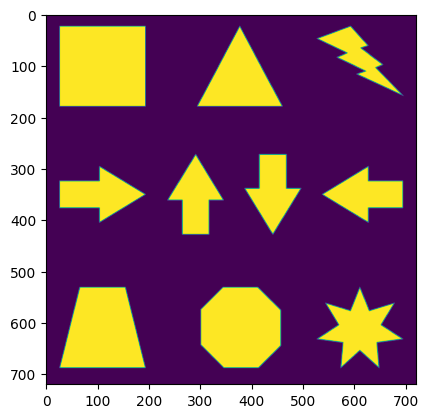

In [6]:
plt.imshow(gr_im)

## Method 1: cv2.Sobel (Convolution)

In [7]:
def m1_compute_gradient_magnitude(gr_im, kx, ky):

    Gx = cv2.Sobel(gr_im, cv2.CV_64F, 1, 0, ksize=kx.shape[0])
    Gy = cv2.Sobel(gr_im, cv2.CV_64F, 0, 1, ksize=ky.shape[0])
    
    # Compute the magnitude of gradients
    magnitude = np.sqrt(Gx**2 + Gy**2)
    
    return magnitude

def m1_compute_gradient_direction(gr_im, kx, ky):

    Gx = cv2.Sobel(gr_im, cv2.CV_64F, 1, 0, ksize=kx.shape[0])
    Gy = cv2.Sobel(gr_im, cv2.CV_64F, 0, 1, ksize=ky.shape[0])
    
    # Compute the direction of gradients
    direction = np.arctan2(Gy, Gx)

    return direction

**Here, we use k_conv**.

In [8]:
m1_magnitude = m1_compute_gradient_magnitude(gr_im, kx_conv, ky_conv)
m1_direction = m1_compute_gradient_direction(gr_im, kx_conv, ky_conv)

## Method 2: cv2.filter2D (Cross-Correlation)

In [9]:
def m2_compute_gradient_magnitude(gr_im, kx, ky):

    Gx = cv2.filter2D(gr_im, cv2.CV_64F, kx)
    Gy = cv2.filter2D(gr_im, cv2.CV_64F, ky)

    # Compute the magnitude of gradients
    magnitude = np.sqrt(Gx**2 + Gy**2)
    
    return magnitude


def m2_compute_gradient_direction(gr_im, kx, ky):
    Gx = cv2.filter2D(gr_im, cv2.CV_64F, kx)
    Gy = cv2.filter2D(gr_im, cv2.CV_64F, ky)

    # Compute the direction of gradients
    direction = np.arctan2(Gy, Gx)

    return direction

**Here, we use k_cross**.

In [10]:
m2_magnitude = m2_compute_gradient_magnitude(gr_im, kx_cross, ky_cross)
m2_direction = m2_compute_gradient_direction(gr_im, kx_cross, ky_cross)

## Method 3: scipy.signal.convolve2d (Convolution)

In [11]:
from scipy.signal import convolve2d

In [12]:
def m3_compute_gradient_magnitude(gr_im, kx, ky):

    Gx = convolve2d(gr_im, kx, mode='same')
    Gy = convolve2d(gr_im, ky, mode='same')
    
    # Compute the magnitude of gradients
    magnitude = np.sqrt(Gx**2 + Gy**2).astype(np.float64)
    
    return magnitude

def m3_compute_gradient_direction(gr_im, kx, ky):

    Gx = convolve2d(gr_im, kx, mode='same')
    Gy = convolve2d(gr_im, ky, mode='same')
    
    # Compute the direction of gradients
    direction = np.arctan2(Gy, Gx).astype(np.float64)
    
    return direction

**Here, we use k_conv**.

In [13]:
# Compute the gradient magnitude and direction
m3_magnitude = m3_compute_gradient_magnitude(gr_im, kx_conv, ky_conv)
m3_direction = m3_compute_gradient_direction(gr_im, kx_conv, ky_conv)

## Method 4: scipy.ndimage.convolve (Convolution)

This is what ChatGPT returns. But some students forget to convert the data type to float, causing errors.

In [14]:
from scipy import ndimage

In [15]:
def m4_compute_gradient_magnitude(gr_im, kx, ky):

    Gx = ndimage.convolve(gr_im.astype(float), kx)
    Gy = ndimage.convolve(gr_im.astype(float), ky)

    # Compute the magnitude of gradients
    magnitude = np.sqrt(Gx**2 + Gy**2).astype(np.float64)

    return magnitude

def m4_compute_gradient_direction(gr_im, kx, ky):

    Gx = ndimage.convolve(gr_im.astype(float), kx)
    Gy = ndimage.convolve(gr_im.astype(float), ky)
    
    # Compute the direction of gradients
    direction = np.arctan2(Gy, Gx).astype(np.float64)
    
    return direction

**Here, we use k_conv**.

In [16]:
m4_magnitude = m4_compute_gradient_magnitude(gr_im, kx_conv, ky_conv)
m4_direction = m4_compute_gradient_direction(gr_im, kx_conv, ky_conv)

## Method 5: cv2.addWeighted / cv2.phase (Wrong Sum)

Some students followed the OpenCV documentation: https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html

They used $G = |G_x| + |G_y|$, rather than $G = \sqrt{G_x^2 + G_y^2}$

In [17]:
def m5_compute_gradient_magnitude(gr_im, kx, ky):
    x,y = gr_im.shape
    # calculate the derivatives in x and y directions
    grad_x = cv2.filter2D(gr_im, cv2.CV_64F, kx)
    grad_y = cv2.filter2D(gr_im, cv2.CV_64F, ky)

    gradSum = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

    return gradSum

def m5_compute_gradient_direction(gr_im, kx, ky):
    # calculate the derivatives in x and y directions
    grad_x = cv2.filter2D(gr_im, cv2.CV_64F, kx)
    grad_y = cv2.filter2D(gr_im, cv2.CV_64F, ky)

    direction = cv2.phase(grad_x, grad_y, angleInDegrees=False)
    return direction

In [18]:
m5_magnitude = m5_compute_gradient_magnitude(gr_im, kx_cross, ky_cross)
m5_direction = m5_compute_gradient_magnitude(gr_im, kx_cross, ky_cross)

## Method 6: cv2.filter2D (Wrong, parameter -1)

Some students added an extra parameter -1 in the wrong place.

It's either -1 or cv2.CV_64F. Can't use both.
```
grad_x = cv2.filter2D(gr_im, -1, kx)
grad_x = cv2.filter2D(gr_im, cv2.CV_64F, kx)
```

In [19]:
def m6_compute_gradient_magnitude(gr_im, kx, ky):
    grad_x = cv2.filter2D(gr_im, -1, cv2.CV_64F, kx)
    grad_y = cv2.filter2D(gr_im, -1, cv2.CV_64F, ky)
    
    return np.sqrt(grad_x**2 + grad_y**2).astype(np.float64)

def m6_compute_gradient_direction(gr_im, kx, ky):
    grad_x = cv2.filter2D(gr_im, -1, cv2.CV_64F, kx)
    grad_y = cv2.filter2D(gr_im, -1, cv2.CV_64F, ky)
    
    return np.arctan2(grad_y, grad_x).astype(np.float64)

In [20]:
m6_magnitude = m6_compute_gradient_magnitude(gr_im, kx_cross, ky_cross)
m6_direction = m6_compute_gradient_direction(gr_im, kx_cross, ky_cross)

## Save outputs

In [21]:
np.save('data/question1_magnitude.npy', m1_magnitude)
np.save('data/question1_direction.npy', m1_direction)

## Put students' implementations here

In [22]:
def compute_gradient_magnitude(gr_im, kx, ky):
    # Ensure the image is a float64 for computation
    gr_im_float64 = gr_im.astype(np.float64)

    # Compute gradients in x and y direction
    grad_x = cv2.filter2D(gr_im_float64, -1, kx.astype(np.float64))
    grad_y = cv2.filter2D(gr_im_float64, -1, ky.astype(np.float64))

    # Compute gradient magnitude
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    return magnitude

def compute_gradient_direction(gr_im, kx, ky):
    # Ensure the image is a float64 for computation
    gr_im_float64 = gr_im.astype(np.float64)
    
    # Compute gradients in x and y direction
    grad_x = cv2.filter2D(gr_im_float64, -1, kx.astype(np.float64))
    grad_y = cv2.filter2D(gr_im_float64, -1, ky.astype(np.float64))

    # Compute gradient direction
    direction = np.arctan2(grad_y, grad_x)
    
    return direction

Different APIs use different kernels:
- cv2.Sobel(gr_im, cv2.CV_64F, 1, 0, ksize=kx.shape[0]) ==> k_conv
- cv2.filter2D(gr_im, cv2.CV_64F, kx) ==> k_cross
- scipy.signal.convolve2d(gr_im, kx, mode='same') ==> k_conv
- ndimage.convolve(gr_im.astype(float), kx) ==> k_conv

In [23]:
# For convolution
# magnitude = compute_gradient_magnitude(gr_im, kx_conv, ky_conv)
# direction = compute_gradient_direction(gr_im, kx_conv, ky_conv)

# For Cross-Correlation
magnitude = compute_gradient_magnitude(gr_im, kx_cross, ky_cross)
direction = compute_gradient_direction(gr_im, kx_cross, ky_cross)

## Test (Should output ALL PASS)

Restart and Run ALL for each submission

In [24]:
assert np.allclose(m1_magnitude, magnitude), np.allclose(m1_direction, direction)
print ("PASS: Method 1")

assert np.allclose(m2_magnitude, magnitude), np.allclose(m2_direction, direction)
print ("PASS: Method 2")

assert np.allclose(m3_magnitude, magnitude), np.allclose(m3_direction, direction)
print ("PASS: Method 3")

assert np.allclose(m4_magnitude, magnitude), np.allclose(m4_direction, direction)
print ("PASS: Method 4")

print ("ALL PASS")

PASS: Method 1
PASS: Method 2
PASS: Method 3
PASS: Method 4
ALL PASS
